### 口红色号识别

In [ ]:
方法
1.使用cv识别到人脸的唇部口红颜色
2.识别出主要的RGB颜色
3.与数据库中RGB值进行对比，选出最接近的颜色

In [12]:
 # 得到指定图片的主要颜色
import colorsys


def get_dominant_color(image):

    #颜色模式转换，以便输出rgb颜色值
    image = image.convert('RGBA')

    #生成缩略图，减少计算量，减小cpu压力
    image.thumbnail((200, 200))

    max_score = 0
    dominant_color = 0

    for count, (r, g, b, a) in image.getcolors(image.size[0] * image.size[1]):
        # 跳过纯黑色
        if a == 0:
            continue

        saturation = colorsys.rgb_to_hsv(r / 255.0, g / 255.0, b / 255.0)[1]

        y = min(abs(r * 2104 + g * 4130 + b * 802 + 4096 + 131072) >> 13, 235)

        y = (y - 16.0) / (235 - 16)

        # 忽略高亮色
        if y > 0.9:
            continue

        # Calculate the score, preferring highly saturated colors.
        # Add 0.1 to the saturation so we don't completely ignore grayscale
        # colors by multiplying the count by zero, but still give them a low
        # weight.
        score = (saturation + 0.1) * count

        if score > max_score:
            max_score = score
            dominant_color = (r, g, b)

    return dominant_color

In [30]:
from PIL import Image
test_11 = Image.open("datasets/11.png")
test_11_rgb = list(get_dominant_color(test_11))
test_11_rgb

[180, 55, 69]

In [6]:
test_22 = Image.open("datasets/22.png")
list(get_dominant_color(test_22))

(221, 50, 66)

In [22]:
# 读取口红数据库信息
import pandas as pd
lipstick = pd.read_json("datasets/lipstick.json")
brands=lipstick["brands"]
brands

0    {'name': '圣罗兰', 'series': [{'name': '莹亮纯魅唇膏', ...
1    {'name': '香奈儿可可小姐', 'series': [{'name': '唇膏水亮'...
2    {'name': '迪奥', 'series': [{'name': '魅惑釉唇膏', 'l...
3    {'name': '美宝莲', 'series': [{'name': '绝色持久唇膏绒情哑...
4    {'name': '纪梵希', 'series': [{'name': '高定香榭天鹅绒唇膏...
Name: brands, dtype: object

In [25]:
# 圣罗兰 Saint Laurent
# saint_laurent=brands[0]
brands[0]["series"][0]["name"]

'莹亮纯魅唇膏'

In [23]:
# saint_laurent=brands[0]


def get_lipsticks(brands):
    brands_len = len(brands)
    for i in range(brands_len):

        for j in range(len(brands[i]["series"])):

            for data in brands[i]["series"][j]["lipsticks"]:

                yield [data["id"], data["name"], data["color"], brands[i][
                    "series"][j]["name"], brands[i]["name"]]

In [24]:
import numpy as np
lipstick_data = []
for data in get_lipsticks(brands):
    lipstick_data.append(data)

lipstick_data = np.array(lipstick_data)

In [9]:
len(lipstick_data[:,2])

287

In [25]:
from PIL import ImageColor
lipstick_color=lipstick_data[:,2]
def get_rgb_color(lipstick_color):
    for c in lipstick_color:
        yield list(ImageColor.getrgb(c))

In [26]:
lipstick_colors=[]
for c in get_rgb_color(lipstick_color):
    lipstick_colors.append(c)

In [27]:
lipstick_colors=np.array(lipstick_colors)
lipstick_colors[0]

array([214,  35,  82])

In [28]:
 def get_labels(test_data):
    # 1.求最短距离
    distances = (((test_data - lipstick_colors)**2).sum(axis=1))**0.5
    # 2.排序
    nearset_index = np.argsort(distances)
    # 3.取出最近的k值
    topK_k = [lipstick_data[i] for i in nearset_index[:3]]
    return topK_k

In [42]:
topK_l = [lipstick_data[i] for i in nearset_index[:3]]
topK_l

[array(['15', '突然', '#AB3B48', '莹亮灿金唇彩', '圣罗兰'], dtype='<U29'),
 array(['11', '御姐橘', '#BA353C', '禁忌之吻霓虹唇膏', '纪梵希'], dtype='<U29'),
 array(['10', '帅T红', '#B53D52', '禁忌之吻霓虹唇膏', '纪梵希'], dtype='<U29')]

In [13]:
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
# 测试的图片
def show_image_plt(image_path):

    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    return img

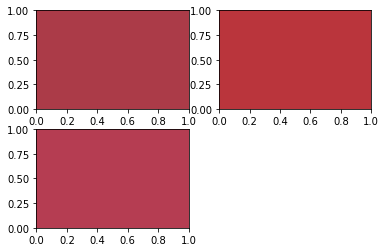

In [55]:
# 获得口红色号前三名
fig= plt.figure(1)  # 创建图表1
axs0=plt.subplot(221,facecolor='#AB3B48') 
axs1=plt.subplot(222,facecolor='#BA353C')
axs2=plt.subplot(223,facecolor='#B53D52')

In [57]:
## 测试2
test_22 = Image.open("datasets/22.png")
test2=np.array(list(get_dominant_color(test_22)))
test2

array([221,  50,  66])

In [67]:
get_labels(test2)

[array(['12', '红粉派对', '#DF3443', '莹亮纯魅唇膏', '圣罗兰'], dtype='<U29'),
 array(['62', '蒙特卡罗', '#E12948', '唇膏水亮', '香奈儿可可小姐'], dtype='<U29'),
 array(['43', '玫瑰歌谣', '#E23E44', '纯色唇釉叛逆裸唇', '圣罗兰'], dtype='<U29')]

(-0.5, 438.5, 152.5, -0.5)

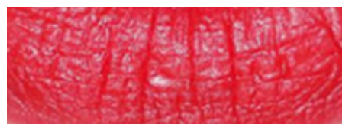

In [66]:
plt.imshow(test_22)
plt.axis('off')

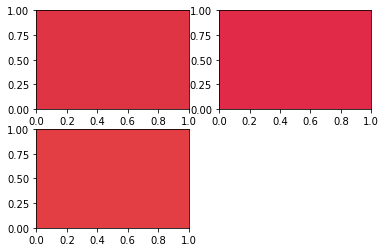

In [68]:
fig= plt.figure(1)  # 创建图表1
axs0=plt.subplot(221,facecolor='#DF3443') 
axs1=plt.subplot(222,facecolor='#E12948')
axs2=plt.subplot(223,facecolor='#E23E44')

(-0.5, 217.5, 81.5, -0.5)

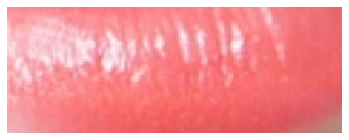

In [71]:
# xne44.png
xne44 = Image.open("datasets/xne44.png")
xne44_rgb=np.array(list(get_dominant_color(xne44)))
plt.imshow(xne44)
plt.axis('off')

In [72]:
get_labels(xne44_rgb)

[array(['41', '告白', '#EC6A70', '莹亮纯魅唇膏', '圣罗兰'], dtype='<U29'),
 array(['79', '传奇', '#E86A75', '唇膏水亮', '香奈儿可可小姐'], dtype='<U29'),
 array(['7', '珊瑚挑逗', '#ED6D68', '莹亮纯魅美唇膏', '圣罗兰'], dtype='<U29')]

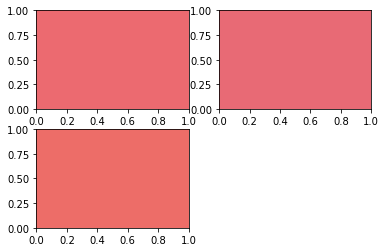

In [73]:
fig= plt.figure(1)  # 创建图表1
axs0=plt.subplot(221,facecolor='#EC6A70') 
axs1=plt.subplot(222,facecolor='#E86A75')
axs2=plt.subplot(223,facecolor='#ED6D68')

In [1]:
## 获取唇部口红
import numpy as np
import cv2
import dlib
from PIL import Image


def detect_mouth(img, pos):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)
    detector = dlib.get_frontal_face_detector()
    #use the predictor
    predictor = dlib.shape_predictor(
        'datasets/shape_predictor_68_face_landmarks.dat')
    dets = detector(img, 1)
    print("Number of faces detected: {}".format(len(dets)))
    for a in dets:
        cv2.rectangle(img, (a.left(), a.top()), (a.right(), a.bottom()),
                      (255, 0, 0))
    #point_list=[]#save the mouth point to point_list[]#
    #Extract 68 feature points of the face and crop the lip image#
    for index, face in enumerate(dets):
        print('face {}; left {}; top {}; right {}; bottom {}'.format(
            index, face.left(), face.top(), face.right(), face.bottom()))
        shape = predictor(gray, face)
        for i, pt in enumerate(shape.parts()):
            #print('Part {}: {}'.format(i, pt))
            #print(i)
            pt_pos = (pt.x, pt.y)
            if i >= 48 and i <= 67:
                cv2.circle(img, pt_pos, 2, (255, 0, 0), 1)
            if i >= 56 and i <= 58:
                #print(pt_pos)
                pos[i - 56][0] = pt.x
                pos[i - 56][1] = pt.y
            #cv2.circle(img, pt_pos, 2, (255, 0, 0), 1)
    return img

In [2]:
img=cv2.imread("datasets/face1.jpg")
#cv2.imshow("face1",img)

In [3]:
  #copy the input image for the later crop#
img_clone=np.copy(img)
cv2.imwrite("datasets/face1_1.jpg",img_clone)


True

In [5]:
pos=np.zeros((3,2),dtype=int)
pos

array([[0, 0],
       [0, 0],
       [0, 0]])

In [10]:
result = detect_mouth(img, pos)
cv2.imwrite("datasets/mouth1.jpg",result)

Number of faces detected: 1
face 0; left 390; top 118; right 613; bottom 341


True

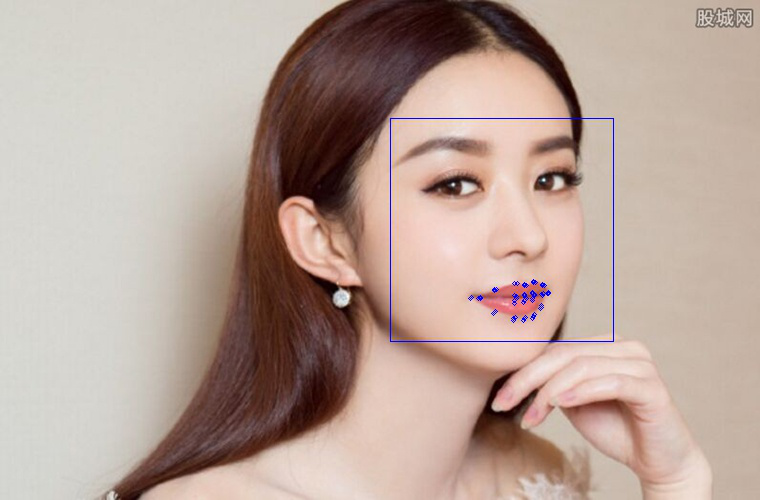

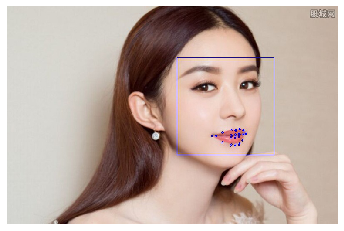

In [14]:
show_image_plt("datasets/mouth1.jpg")

In [15]:
def crop(img, pos):

    x1 = pos[2][0]
    y1 = pos[2][1]
    x2 = pos[1][0]
    y2 = pos[1][1]
    d = abs(x2 - x1)
    region = img[(int)(y1 - d * 0.75):y2, x1:x2]
    # save the image
    cv2.imwrite("datasets/mounth1_1.jpg", region)

    x1 = pos[1][0]
    y1 = pos[1][1]
    x2 = pos[0][0]
    y2 = pos[0][1]
    d = abs(x1 - x2)
    region = img[y1 - d:y2, x1:x2]
    # save the image
    cv2.imwrite("datasets/mounth1_2.jpg", region)

In [16]:
c_img=cv2.imread("datasets/face1_1.jpg")
crop(c_img,pos)

In [17]:
!ls datasets/

11.png	     face2.jpg	    mouth1.jpg
22.png	     lipstick.json  shape_predictor_68_face_landmarks.dat
face1_1.jpg  mounth1_1.jpg  xne44.png
face1.jpg    mounth1_2.jpg


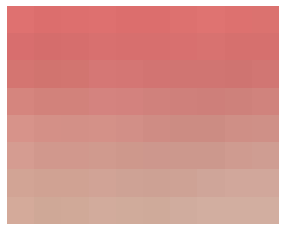

In [18]:
show_image_plt("datasets/mounth1_1.jpg")

(220, 110, 109)

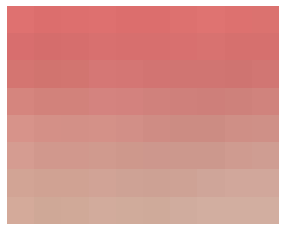

In [20]:
t1=show_image_plt("datasets/mounth1_1.jpg")
get_dominant_color(t1)

In [29]:
import numpy as np
get_labels(np.array(get_dominant_color(t1)))

[array(['13', '邂逅巴黎', '#E06F70', '莹亮纯魅唇膏', '圣罗兰'], dtype='<U29'),
 array(['15', '珊瑚恋人', '#E06C68', '莹亮纯魅唇膏', '圣罗兰'], dtype='<U29'),
 array(['08', '珊瑚粉', '#DE6A78', '甜吻唇颊霜', '圣罗兰'], dtype='<U29')]

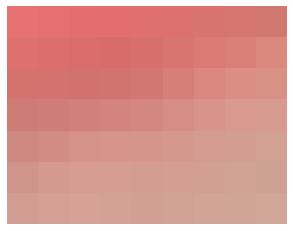

In [30]:
t2=show_image_plt("datasets/mounth1_2.jpg")

In [31]:
get_labels(np.array(get_dominant_color(t2)))

[array(['200', '丰唇唇釉', '#DC9F8F', '纯色唇釉叛逆裸唇', '圣罗兰'], dtype='<U29'),
 array(['54', '卡柏男孩', '#D1918D', '唇膏水亮', '香奈儿可可小姐'], dtype='<U29'),
 array(['426', '', '#D58F7F', '烈艳蓝金唇膏', '迪奥'], dtype='<U29')]

误差
1. 嘴唇区域截取不可避免会截取到皮肤中的一部分颜色，虽然算法已经将那种可能降到最低；
2. 颜色提取上，虽然截取多个嘴唇图片求平均值，但是本身的提取算法还是和实际值稍有偏差；
3. RGB颜色相似度比对的算法也不够精确；
4. 最最重要的是，照片必须是原图，而且光线要自然，加了滤镜的图是怎么也不可能识别出来的。

In [6]:
import time
import dlib


def detect_face():
    capInput = cv2.VideoCapture(0)
    #nextCaptureTime = time.time()
    faces = []
    feas = []
    if not capInput.isOpened():
        print('Capture failed because of camera')
    while 1:
        ret, img = capInput.read()
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray = cv2.equalizeHist(gray)
        time = 0
        eTime = time.time() + 0.1
        detector = dlib.get_frontal_face_detector()
        predictor = dlib.shape_predictor(
            'datasets/shape_predictor_68_face_landmarks.dat')
        dets = detector(gray, 1)
        print("Number of faces detected: {}".format(len(dets)))
        for a in dets:
            cv2.rectangle(img, (a.left(), a.top()), (a.right(), a.bottom()),
                          (255, 0, 0))
        for index, face in enumerate(dets):
            print('face {}; left {}; top {}; right {}; bottom {}'.format(
                index, face.left(), face.top(), face.right(), face.bottom()))
            shape = predictor(gray, face)
            for i, pt in enumerate(shape.parts()):
                #print('Part {}: {}'.format(i, pt))
                pt_pos = (pt.x, pt.y)
                cv2.circle(img, pt_pos, 2, (255, 0, 0), 1)
        #cv2.imshow('FaceDetect',img)

        if cv2.waitKey(1) & 0xFF == 27:
            break
    capInput.release()
    cv2.destroyAllWindows()
    return img

In [7]:
detect_face()

Capture failed because of camera


error: OpenCV(4.1.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
